In [1]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import pandas as pd

In [2]:
#load data
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
#seperate features and target
x= data.iloc[:,:-1]
y= data.iloc[:,-1]

In [4]:
#Split the model to train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [5]:
#INITIALIZE base classifiers
svc=SVC(probability=True,random_state=42)
knn =KNeighborsClassifier()
lr=LogisticRegression(random_state=42)

In [6]:
#initialize adaboost classifier
adaboost=AdaBoostClassifier(base_estimator=svc,n_estimators=50,learning_rate=1,random_state=42)

In [7]:
#initialize gradient boosting classifier
gb=GradientBoostingClassifier(n_estimators=50,learning_rate=1,random_state=42)

In [8]:
#initialize gradient boosting classifiers
estimators = [('svc',svc),('knn',knn),('lr',lr)]
stacking=StackingClassifier(estimators=estimators,final_estimator=LogisticRegression(random_state=42))

In [9]:
#Train and evaluate classifiers
for clf in [adaboost,gb,stacking]:
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    print(f"{clf.__class__.__name__}accuracy:{accuracy_score(y_test,y_pred)}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifieraccuracy:0.40625
GradientBoostingClassifieraccuracy:0.6125


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

StackingClassifieraccuracy:0.55625


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#define function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred,title):
    labels=sorted(y_true.unique())
    cm=confusion_matrix(y_true,y_pred,labels=labels)
    sns.heatmap(cm,annot= True,cmap="Blues",fmt="d",xticklabels=labels,yticklabels=labels)
    plt.title(title)
    plt.xlabel("predicted label")
    plt.ylabel("true label")
    plt.show()

In [12]:
# initilaize classifiers
classifiers = [adaboost, gb, stacking]

AdaBoostClassifier accuracy: 0.40625


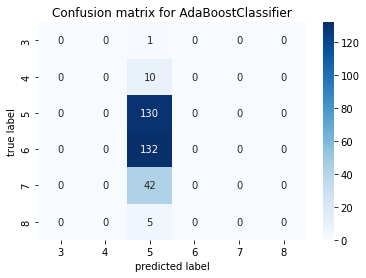

GradientBoostingClassifier accuracy: 0.6125


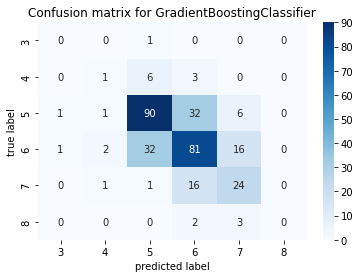

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

StackingClassifier accuracy: 0.5625


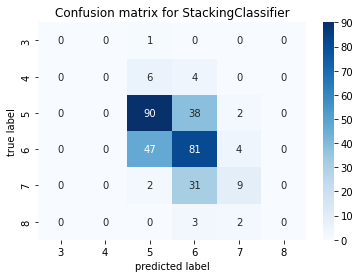

In [ ]:
#evaluate classifiers and plot confusion matrix for each
for clf in classifiers:
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(f"{clf.__class__.__name__} accuracy: {accuracy_score(y_test,y_pred)}")
    plot_confusion_matrix(y_test,y_pred, title =f"Confusion matrix for {clf.__class__.__name__}")

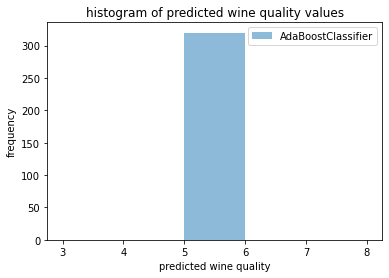

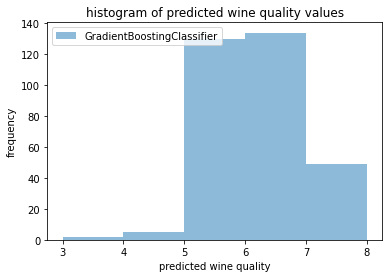

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

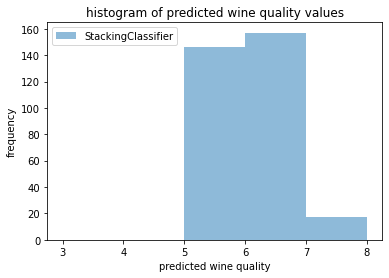

In [ ]:
#plot histogram of predicted wine quality values
for clf in classifiers:
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    plt.hist(y_pred, bins=range(3,9), alpha=0.5, label=clf.__class__.__name__)
    plt.legend()
    plt.xlabel("predicted wine quality")
    plt.ylabel("frequency")
    plt.title("histogram of predicted wine quality values")
    plt.show()